In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Load and analyze data

In [7]:
### read the raw file from github repo.
df = pd.read_csv('https://github.com/rugonzs/Behind-AI/raw/main/data/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


### Transform categorical features

The dataset has 1338 samples and 7 features

The target feature (y) is charges.

The predictor features (x) are: age, sex, bmi, children, smoker and region.

Three features are categorical: sex, smoker and region.

Three features are numerical: age, bmi and children.

The categorical features are going to be converted using the integer encoding 
technique.

In [17]:
for c in ['sex', 'smoker' , 'region']:
    print('values in ',c, ' : ', df[c].unique() )

values in  sex  :  ['female' 'male']
values in  smoker  :  ['yes' 'no']
values in  region  :  ['southwest' 'southeast' 'northwest' 'northeast']


The dictionary for conversion will be:

    sex: female => 1 male => 0
    
    smoker: yes => 1 no => 0
    
    region: southwest => 0  southeast => 1 northwest => 2 northeast => 3

In [18]:
dict_sex = {'female' : 1, 'male' : 0}
dict_smoker = {'yes' : 1, 'no' : 0}
dict_region = {'southwest' : 0, 'southeast' : 1, 'northwest' : 2, 'northeast' : 3}

In [20]:
df = df.replace({"sex" : dict_sex})
df = df.replace({"smoker" : dict_smoker})
df = df.replace({"region" : dict_region})
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [21]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

### Normalize the features

After converting the values the next step is normalize the data, the techniques used will be min max between 0 and 1. Also the target will be converted. 
The max / min values for each column should be stored, this will help in production to discover feature over or under this values and throw an alert of drift detection (data drift is the detection of difference between training and production dataset), to put in know of the user that the results of the models could not be correct.

In [26]:
dict_norm = {}
for c in df.columns:
    dict_norm.update({c : {'min' : df[c].min(), 'max' : df[c].max()}})
dict_norm

{'age': {'min': 18, 'max': 64},
 'sex': {'min': 0, 'max': 1},
 'bmi': {'min': 15.96, 'max': 53.13},
 'children': {'min': 0, 'max': 5},
 'smoker': {'min': 0, 'max': 1},
 'region': {'min': 0, 'max': 3},
 'charges': {'min': 1121.8739, 'max': 63770.42801}}

In [30]:
def normalization(min_value, max_value, value):
    return (value - min_value) / (max_value - min_value)

def denormalization(min_value, max_value, value):
    return (value * (max_value - min_value)) + min_value

In [35]:
for c in df.columns:
    df[c] = df[c].apply(lambda x: normalization(dict_norm[c]['min'] ,
                                                dict_norm[c]['max'] , 
                                                x))
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1.0,0.321227,0.0,1.0,0.000000,0.251611
1,0.000000,0.0,0.479150,0.2,0.0,0.333333,0.009636
2,0.217391,0.0,0.458434,0.6,0.0,0.333333,0.053115
3,0.326087,0.0,0.181464,0.0,0.0,0.666667,0.333010
4,0.304348,0.0,0.347592,0.0,0.0,0.666667,0.043816


### Split data

In [36]:
from sklearn.model_selection import train_test_split

In [41]:
x_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y_column =  ['charges']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
            df[x_columns], df[y_column], test_size=0.3, random_state=0)

In [52]:
print('x_train shape:' ,x_train.shape)
print('y_train shape:' ,y_train.shape)
print('x_test shape:' ,x_test.shape)
print('y_test shape:' ,y_test.shape)

x_train shape: (936, 6)
y_train shape: (936, 1)
x_test shape: (402, 6)
y_test shape: (402, 1)


### Train Model

In [53]:
LR = LinearRegression()

In [55]:
LR = LR.fit(x_train.values,y_train.values)

### Evaluate the model

In [59]:
def r2(y_true,y_pred):
    #### r2 = (1 - (u / v))
    u = ((y_true - y_pred)** 2).sum()
    v = ((y_true - y_true.mean()) ** 2).sum()
    return (1 - (u / v))

In [62]:
### The result are evaluate using the r2 function
### comparing prediction against true data.

print('Score of the model for training set: ', r2(y_train.values, LR.predict(x_train.values)))
print('Score of the model for test set: ', r2(y_test.values, LR.predict(x_test.values)))

Score of the model for training set:  0.7306840408360218
Score of the model for test set:  0.7911113876316933


### Understanding Linear Regression

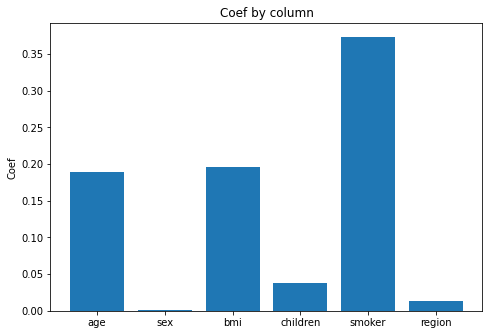

[0.18839308 0.0007884  0.19521305 0.03823592 0.37351674 0.01323171]


In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
columns = x_columns
coef = LR.coef_[0]
ax.bar(columns,coef)
ax.set_ylabel('Coef')
ax.set_title('Coef by column')
plt.show()
print(coef)

Behind a basic Linear Regression is a basic equation, the equation has the next form:
LR = Σ coef_feature * value_feature

For our example the the LR has the next equation
LR = coef_age * value_age + coef_sex * value_sex + coef_bmi * value_bmi +
     coef_children * value_children + 
     coef_smoker * value_smoker + coef_region * value_region + intercept

To demostrate that I am show how the predict method and the previous equation return the same results.

In [94]:
df_coef = pd.DataFrame([coef],columns = x_columns)
df_coef

,age,sex,bmi,children,smoker,region
0,0.188393,0.000788,0.195213,0.038236,0.373517,0.013232


In [88]:
sample = x_test.sample(1)
sample

,age,sex,bmi,children,smoker,region
231,0.891304,1.0,0.319344,0.6,0.0,0.333333


In [118]:
LR.predict(sample.values)

array([[0.19521293]])

In [122]:
print(LR.intercept_)

[-0.0631832]


In [123]:
result = LR.intercept_
for c in x_columns:
    result = result + (df_coef[c].values[0] * sample[c].values[0]) 
print(result)

[0.19521293]


As a conclusion, Linear Regression is a basic equation that has as a key of the prediction the coef for each feature and the intercept, this parameters are which learn in the training phase (fit method). This coef indicate the importance of each feature for the equation, for this example smoke, bmi and age are the most important. The coef could be positive or negative, the most negative or most positive are the features most importante, because affect direct or indirect to the outcome. 

Remember that the models are math, and you can save the traned model and load it in production, but also you can take the coef and implement a function that calculate your prediction. This equation could be implement in any language.

### Thanks!